In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import sqlite3
import geopandas as gpd
import geobr
import matplotlib.pyplot as plt
import libpysal
from libpysal.weights.contiguity import Queen
import esda
from splot.esda import moran_scatterplot
from splot.esda import lisa_cluster

In [2]:
#Leitura dos indicadores por região imediata
cnx = sqlite3.connect("indicadores.db")
cur = cnx.cursor()
regimed_df = pd.read_sql_query("SELECT * FROM imedreg_df", cnx)
regimed_df.head()

,imediate_reg,imed_reg_code,epidemiological_week,week_last_day,state,region,city_ibge_code,total_inhabitants,last_available_confirmed,last_available_deaths,new_week_cases,new_week_deaths,prevalence,mortality,lethality,incidence_cases,incidence_deaths,cases_growth_factor,deaths_growth_factor
0,Abaetetuba,150003,9,2020-02-29,PA,norte,6016072,439624.04368,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Abaetetuba,150003,10,2020-03-07,PA,norte,6016072,439624.04368,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Abaetetuba,150003,11,2020-03-14,PA,norte,6016072,439624.04368,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Abaetetuba,150003,12,2020-03-21,PA,norte,6016072,439624.04368,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Abaetetuba,150003,13,2020-03-28,PA,norte,6016072,439624.04368,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#Leitura da geometrias das regiões e merge com os indicadores
ri_geo = geobr.read_immediate_region()
ri_geo = ri_geo.rename(columns={'code_immediate':'imed_reg_code'})
ri_geo['imed_reg_code'] = ri_geo['imed_reg_code'].astype(int)
ri_geo = ri_geo.merge(regimed_df, on = 'imed_reg_code')
ri_geo.head()

,imed_reg_code,name_immediate,code_state,abbrev_state,name_state,code_region,name_region,geometry,imediate_reg,epidemiological_week,...,last_available_deaths,new_week_cases,new_week_deaths,prevalence,mortality,lethality,incidence_cases,incidence_deaths,cases_growth_factor,deaths_growth_factor
0,110001,Porto Velho,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...",Porto Velho,9,...,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,110001,Porto Velho,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...",Porto Velho,10,...,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,110001,Porto Velho,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...",Porto Velho,11,...,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,110001,Porto Velho,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...",Porto Velho,12,...,0,2,0,0.303159,0.0,0.0,0.303159,0.0,0.0,0.0
4,110001,Porto Velho,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...",Porto Velho,13,...,0,3,0,0.757897,0.0,0.0,0.454738,0.0,1.5,0.0


In [25]:
#Alterar aqui para mudar a semana analisada
sem = ri_geo[ri_geo['epidemiological_week'] == 34]
str_sem = '34'
sem.head()

,imed_reg_code,name_immediate,code_state,abbrev_state,name_state,code_region,name_region,geometry,imediate_reg,epidemiological_week,...,last_available_deaths,new_week_cases,new_week_deaths,prevalence,mortality,lethality,incidence_cases,incidence_deaths,cases_growth_factor,deaths_growth_factor
25,110001,Porto Velho,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...",Porto Velho,34,...,734,1134,18,4638.029145,111.259344,2.398850,171.891138,2.728431,0.762097,0.529412
55,110002,Ariquemes,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-62.48851 -8.73008, -62.48411 ...",Ariquemes,34,...,88,525,6,2235.659358,36.026007,1.611426,214.927882,2.456319,0.801527,0.461538
85,110003,Jaru,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-62.22055 -8.59088, -62.21053 ...",Jaru,34,...,28,188,2,2022.153277,23.224074,1.148482,155.933066,1.658862,0.866359,1.000000
115,110004,Ji-Paraná,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-61.57450 -9.72063, -61.57157 ...",Ji-Paraná,34,...,90,511,9,1468.625951,29.602763,2.015677,168.077908,2.960276,1.049281,0.692308
145,110005,Cacoal,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-61.42731 -10.98755, -61.00059...",Cacoal,34,...,68,551,9,1557.223489,22.472665,1.443124,182.094682,2.974323,1.232662,2.250000


C:\Users\vicda\Anaconda3\envs\geo_env\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 4 islands with ids: 24, 30, 133, 169.
  warnings.warn(message)
C:\Users\vicda\Anaconda3\envs\geo_env\lib\site-packages\splot\_viz_libpysal_mpl.py:115: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_shp = gdf.centroid.values


('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 133, ' is an island (no neighbors)')
('WARNING: ', 169, ' is an island (no neighbors)')


C:\Users\vicda\Anaconda3\envs\geo_env\lib\site-packages\splot\_viz_libpysal_mpl.py:154: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.plot(ax=ax, **node_kws)


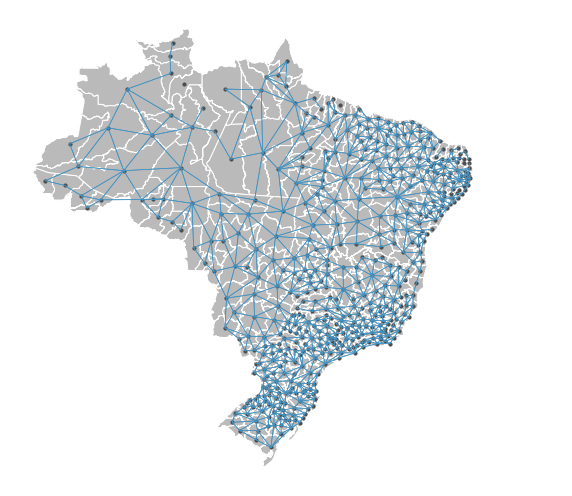

In [26]:
#Cálculo do peso entre regiões
from splot.libpysal import plot_spatial_weights

weights = Queen.from_dataframe(sem)
weights.transform = 'r'
plot_spatial_weights(weights, sem)
plt.show()

C:\Users\vicda\Anaconda3\envs\geo_env\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)
C:\Users\vicda\Anaconda3\envs\geo_env\lib\site-packages\splot\_viz_libpysal_mpl.py:115: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_shp = gdf.centroid.values
C:\Users\vicda\Anaconda3\envs\geo_env\lib\site-packages\splot\_viz_libpysal_mpl.py:154: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.plot(ax=ax, **node_kws)


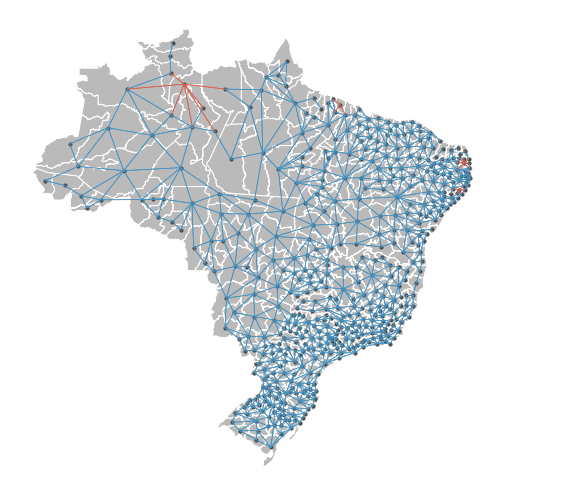

In [27]:
#Consertando os erros causados pela digitalização
wnp = libpysal.weights.util.nonplanar_neighbors(weights, sem)
wnp.transform = 'r'
plot_spatial_weights(wnp, sem)
plt.show()

In [28]:
#Moran Local e Moran I para cada indicador a seguir
spatial_auto = esda.Moran_Local(sem['new_week_cases'], wnp)
moran = esda.Moran(sem['new_week_cases'], wnp)
moran.I

0.05626734875692215

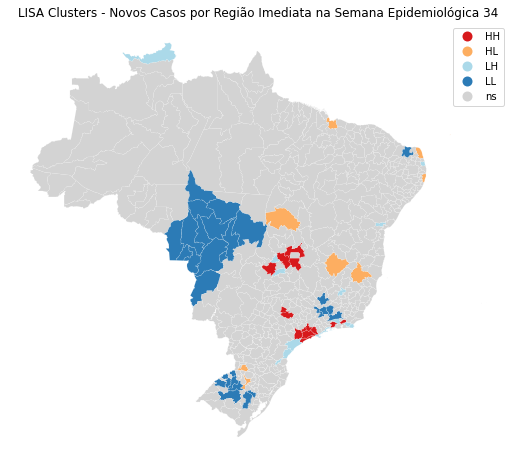

In [29]:
#Plot dos clusters
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))
plt.title('LISA Clusters - Novos Casos por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()

In [30]:
spatial_auto = esda.Moran_Local(sem['new_week_deaths'], wnp)
moran = esda.Moran(sem['new_week_deaths'], wnp)
moran.I

0.042340631730179844

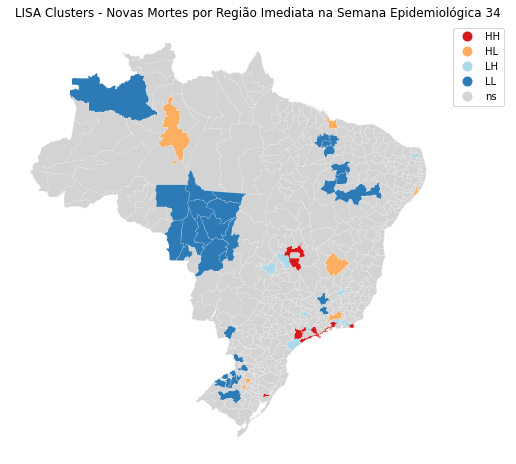

In [31]:
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))

plt.title('LISA Clusters - Novas Mortes por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()

In [32]:
spatial_auto = esda.Moran_Local(sem['prevalence'], wnp)
moran = esda.Moran(sem['prevalence'], wnp)
moran.I

0.6161658920603988

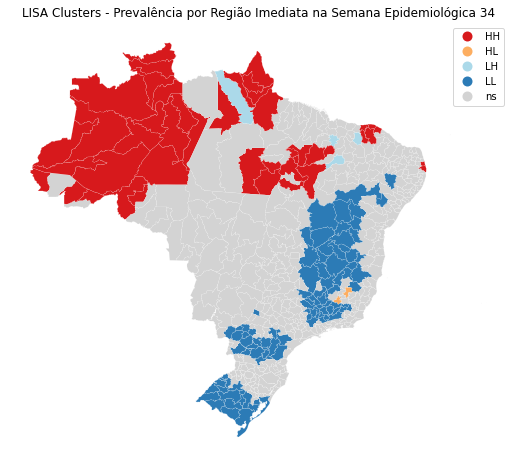

In [33]:
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))

plt.title('LISA Clusters - Prevalência por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()

In [34]:
spatial_auto = esda.Moran_Local(sem['mortality'], wnp)
moran = esda.Moran(sem['mortality'], wnp)
moran.I

0.5501084908439421

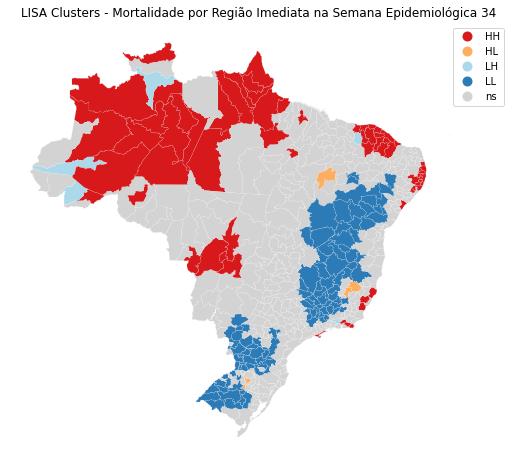

In [35]:
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))

plt.title('LISA Clusters - Mortalidade por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()

In [36]:
spatial_auto = esda.Moran_Local(sem['lethality'], wnp)
moran = esda.Moran(sem['lethality'], wnp)
moran.I

0.4266598904244974

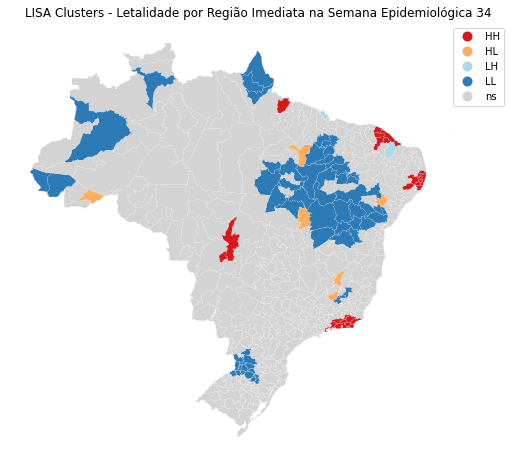

In [37]:
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))

plt.title('LISA Clusters - Letalidade por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()

In [38]:
spatial_auto = esda.Moran_Local(sem['incidence_cases'], wnp)
moran = esda.Moran(sem['incidence_cases'], wnp)
moran.I

0.41117812322499264

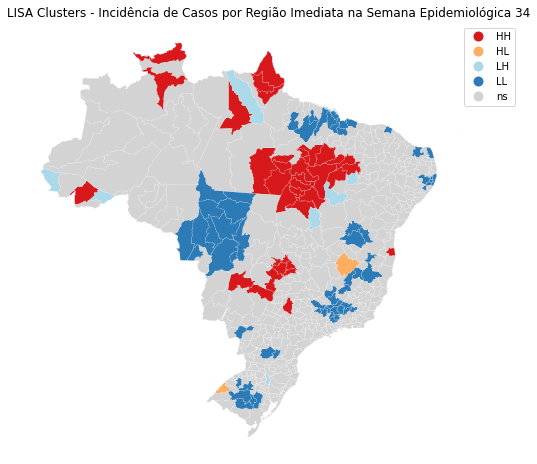

In [39]:
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))

plt.title('LISA Clusters - Incidência de Casos por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()

In [40]:
spatial_auto = esda.Moran_Local(sem['incidence_deaths'], wnp)
moran = esda.Moran(sem['incidence_deaths'], wnp)
moran.I

0.29204405487133306

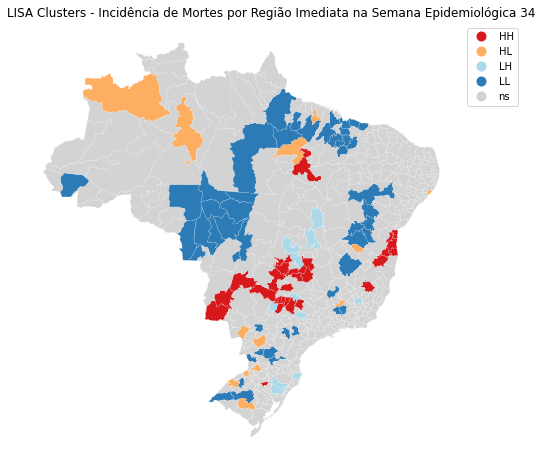

In [41]:
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))

plt.title('LISA Clusters - Incidência de Mortes por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()

In [42]:
spatial_auto = esda.Moran_Local(sem['cases_growth_factor'], wnp)
moran = esda.Moran(sem['cases_growth_factor'], wnp)
moran.I

0.2700540993779313

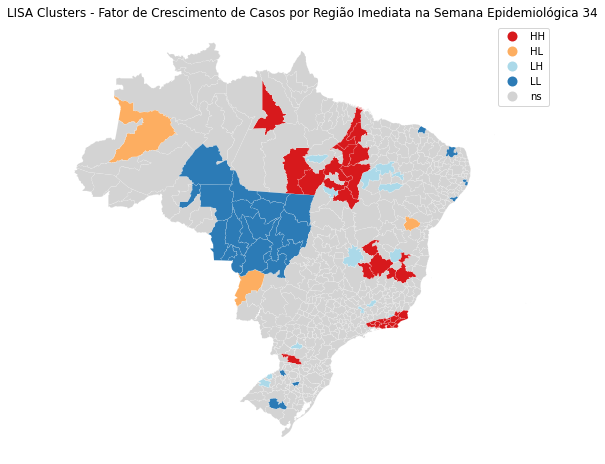

In [43]:
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))

plt.title('LISA Clusters - Fator de Crescimento de Casos por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()

In [44]:
spatial_auto = esda.Moran_Local(sem['deaths_growth_factor'], wnp)
moran = esda.Moran(sem['deaths_growth_factor'], wnp)
moran.I

-0.05209406673986757

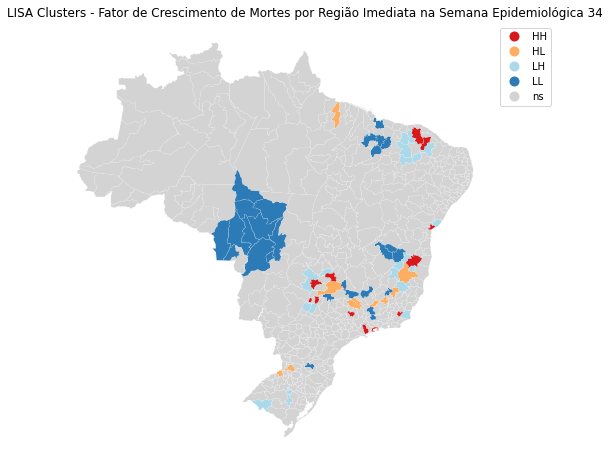

In [45]:
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))

plt.title('LISA Clusters - Fator de Crescimento de Mortes por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()